<a href="https://colab.research.google.com/github/HalyshAnton/Python-AI/blob/AI_3_lesson/Data_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Посібник з Data Engineering

## Вступ
Data Engineering - це процес підготовки, обробки та перетворення даних для подальшого аналізу та моделювання. У цьому посібнику ми розглянемо ключові концепції Data Engineering, такі як аналіз розподілу дат, використання повзучого вікна та групування даних для отримання агрегованих значень.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
N = 1000

df = pd.DataFrame({
    'date': np.random.choice(pd.date_range(start='2020-01-01', periods=100, freq='D'), N),
    'user_id': np.random.choice(range(1, 26), N),
    'time_spent': np.random.normal(50, 10, N),
    'device': np.random.choice(['computer', 'mobile', 'unknown'], N),
    'expenses': np.random.normal(10, 2, N)
})

df['expenses'] += (1+(df['device']=='mobile'))*df['time_spent']

In [6]:
df.head()

,date,user_id,time_spent,device,expenses
0,2020-03-19,16,49.081819,mobile,109.625079
1,2020-03-07,18,41.182465,unknown,50.048566
2,2020-02-12,17,57.129597,mobile,123.971793
3,2020-03-16,12,42.116757,mobile,94.221441
4,2020-03-05,18,58.830629,mobile,126.324214


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1000 non-null   datetime64[ns]
 1   user_id     1000 non-null   int64         
 2   time_spent  1000 non-null   float64       
 3   device      1000 non-null   object        
 4   expenses    1000 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 39.2+ KB


In [8]:
df['date'] = pd.to_datetime(df['date'])

## Аналіз розподілу дат за допомогою гістограми
Гістограма є одним з основних методів візуалізації розподілу дат у наборі даних. Вона дозволяє побачити, як часто зустрічаються певні часові відрізки.

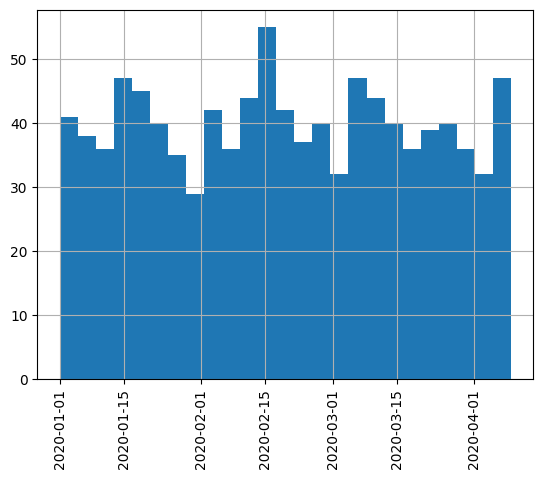

In [13]:
df['date'].hist(bins=25)
plt.xticks(rotation=90)
plt.show()

In [15]:
df['date'].min()

Timestamp('2020-01-01 00:00:00')

In [16]:
df['date'].max()

Timestamp('2020-04-09 00:00:00')

In [17]:
df['date'].max() - df['date'].min()

Timedelta('99 days 00:00:00')

In [20]:
mask = (df['date'] > pd.to_datetime('2020-01-01')) & (df['date'] < pd.to_datetime('2020-02-01'))

In [23]:
df[mask].groupby(by='user_id')['time_spent'].mean()

,time_spent
user_id,
1,44.085207
2,47.992742
3,50.000307
4,50.673605
5,52.325355
6,52.881006
7,55.340145
8,55.878652
9,50.093872


## Ковзуюче вікно (Sliding Window)
Ковзуюче вікно (Sliding Window) — це метод обробки часових рядів, при якому на кожному кроці аналізується певний відрізок даних, що поступово зміщується вперед.

### Основні аспекти:
- **Розмір вікна** (window size) — кількість точок у кожному вікні.
- **Крок вікна** (step size) — на скільки точок зміщується вікно за один раз.
- **Перекриття** (overlapping) — ступінь перекриття між сусідніми вікнами.

![](https://www.researchgate.net/publication/332031784/figure/fig1/AS:950462694039592@1603619373862/Fixed-window-2-Sliding-Window-Sliding-window-is-made-of-a-fixed-length-and-fixed.png)

In [41]:
window_X = pd.Timedelta('20D')
window_y = pd.Timedelta('7D')
gap = pd.Timedelta('7D')

window_X

Timedelta('20 days 00:00:00')

In [30]:
df['norm_date'] = df['date'] - df['date'].min()
df.head()

,date,user_id,time_spent,device,expenses,norm_date
0,2020-03-19,16,49.081819,mobile,109.625079,78 days
1,2020-03-07,18,41.182465,unknown,50.048566,66 days
2,2020-02-12,17,57.129597,mobile,123.971793,42 days
3,2020-03-16,12,42.116757,mobile,94.221441,75 days
4,2020-03-05,18,58.830629,mobile,126.324214,64 days


In [34]:
mask = df['date'] - df['date'].min() < window_X

207

In [35]:
mask = df['norm_date'] < window_X

In [36]:
X1 = df[mask]
X1

,date,user_id,time_spent,device,expenses,norm_date
7,2020-01-06,15,49.326254,mobile,110.715391,5 days
15,2020-01-08,6,71.210619,mobile,154.666478,7 days
24,2020-01-09,13,41.567614,mobile,90.436109,8 days
30,2020-01-08,16,49.121947,mobile,108.423878,7 days
36,2020-01-01,9,56.055577,computer,68.925131,0 days
...,...,...,...,...,...,...
970,2020-01-13,4,62.223080,unknown,73.042862,12 days
973,2020-01-12,18,66.045788,computer,72.963192,11 days
976,2020-01-13,19,60.261597,computer,70.390423,12 days
978,2020-01-12,10,40.843815,computer,50.755325,11 days


In [38]:
X1['date'].min()

Timestamp('2020-01-01 00:00:00')

In [39]:
X1['date'].max()

Timestamp('2020-01-20 00:00:00')

In [42]:
mask = (df['norm_date'] > window_X + gap) & (df['norm_date'] < window_X + gap + window_y)

In [45]:
y1 = df[mask]
y1.head()

,date,user_id,time_spent,device,expenses,norm_date
10,2020-01-30,23,46.738339,mobile,104.335846,29 days
22,2020-01-31,3,51.680242,mobile,112.945267,30 days
62,2020-02-03,11,48.810074,computer,60.811962,33 days
82,2020-02-02,23,46.395225,unknown,55.369705,32 days
86,2020-02-03,14,57.107361,unknown,66.240229,33 days


In [46]:
y1['date'].min()

Timestamp('2020-01-29 00:00:00')

In [47]:
y1['date'].max()

Timestamp('2020-02-03 00:00:00')

## Групування даних по користувачах та агрегація
Групування даних дозволяє об'єднати записи по певним категоріям (наприклад, за користувачем) і розрахувати агреговані значення, такі як середнє, сума, мінімум, максимум та мода.

In [52]:
X1.head()

,date,user_id,time_spent,device,expenses,norm_date
7,2020-01-06,15,49.326254,mobile,110.715391,5 days
15,2020-01-08,6,71.210619,mobile,154.666478,7 days
24,2020-01-09,13,41.567614,mobile,90.436109,8 days
30,2020-01-08,16,49.121947,mobile,108.423878,7 days
36,2020-01-01,9,56.055577,computer,68.925131,0 days


In [75]:
X1_info = X1.groupby(by='user_id').agg({
    'time_spent': ['mean', 'sum', 'min', 'max'],
    'expenses': ['mean', 'sum', 'min', 'max'],
    'device': [lambda col: col.mode()[0]]  # лише одна мода
})

In [76]:
X1_info.head()

time_spent                                     expenses              \
              mean         sum        min        max       mean         sum   
user_id                                                                       
1        45.480150  363.841200  13.141847  72.949107  61.719826  493.758609   
2        47.545948  570.551379  31.356168  64.134086  61.989967  743.879606   
3        49.857558  498.575583  33.249457  64.747418  59.447573  594.475730   
4        54.432317  489.890857  39.847746  71.322372  75.999709  683.997384   
5        51.902008  519.020076  36.009827  69.543264  84.074980  840.749801   

                                  device  
               min         max  <lambda>  
user_id                                   
1        36.556182   90.540340   unknown  
2        43.523193  119.397140   unknown  
3        43.423092   77.250551  computer  
4        50.015156  148.968947   unknown  
5        50.230684  149.644896  computer

In [77]:
X1_info.columns = X1_info.columns.to_flat_index().str.join('_')

In [78]:
X1_info.head()

,time_spent_mean,time_spent_sum,time_spent_min,time_spent_max,expenses_mean,expenses_sum,expenses_min,expenses_max,device_<lambda>
user_id,,,,,,,,,
1,45.480150,363.841200,13.141847,72.949107,61.719826,493.758609,36.556182,90.540340,unknown
2,47.545948,570.551379,31.356168,64.134086,61.989967,743.879606,43.523193,119.397140,unknown
3,49.857558,498.575583,33.249457,64.747418,59.447573,594.475730,43.423092,77.250551,computer
4,54.432317,489.890857,39.847746,71.322372,75.999709,683.997384,50.015156,148.968947,unknown
5,51.902008,519.020076,36.009827,69.543264,84.074980,840.749801,50.230684,149.644896,computer


In [79]:
# X1_info.reset_index(inplace=True)
# X1_info.drop(columns='user_id', inplace=True)

X1_info.head()

,time_spent_mean,time_spent_sum,time_spent_min,time_spent_max,expenses_mean,expenses_sum,expenses_min,expenses_max,device_<lambda>
user_id,,,,,,,,,
1,45.480150,363.841200,13.141847,72.949107,61.719826,493.758609,36.556182,90.540340,unknown
2,47.545948,570.551379,31.356168,64.134086,61.989967,743.879606,43.523193,119.397140,unknown
3,49.857558,498.575583,33.249457,64.747418,59.447573,594.475730,43.423092,77.250551,computer
4,54.432317,489.890857,39.847746,71.322372,75.999709,683.997384,50.015156,148.968947,unknown
5,51.902008,519.020076,36.009827,69.543264,84.074980,840.749801,50.230684,149.644896,computer


In [80]:
y1_info = y1.groupby(by='user_id')[['expenses']].sum()
# y1_info.reset_index(inplace=True)

y1_info.head()

,expenses
user_id,
2,185.519359
3,225.481036
4,94.613193
5,125.936811
6,59.215243


In [86]:
# об'єднання

data = X1_info.join(y1_info)
data.reset_index(inplace=True)
data.drop(columns='user_id', inplace=True)
data.fillna({'expenses': 0}, inplace=True)  # користувач не був активним, прибуток 0

data

,time_spent_mean,time_spent_sum,time_spent_min,time_spent_max,expenses_mean,expenses_sum,expenses_min,expenses_max,device_<lambda>,expenses
0,45.480150,363.841200,13.141847,72.949107,61.719826,493.758609,36.556182,90.540340,unknown,0.000000
1,47.545948,570.551379,31.356168,64.134086,61.989967,743.879606,43.523193,119.397140,unknown,185.519359
2,49.857558,498.575583,33.249457,64.747418,59.447573,594.475730,43.423092,77.250551,computer,225.481036
3,54.432317,489.890857,39.847746,71.322372,75.999709,683.997384,50.015156,148.968947,unknown,94.613193
4,51.902008,519.020076,36.009827,69.543264,84.074980,840.749801,50.230684,149.644896,computer,125.936811
5,50.698543,304.191255,25.851019,71.210619,77.606556,465.639338,56.706100,154.666478,computer,59.215243
6,54.091179,432.729431,47.532022,60.407354,83.764513,670.116106,58.306477,126.175104,computer,0.000000
7,54.936547,494.428924,43.093184,63.719208,76.255360,686.298236,53.365718,125.026749,computer,222.729946
8,50.040679,500.406789,40.281864,65.135121,60.067839,600.678390,47.572682,73.733772,computer,60.286138
9,48.616312,243.081562,37.288620,64.017162,67.274834,336.374170,44.441324,103.645910,computer,308.861245


## Побудова моделі

In [ ]:
y = data['expenses']
X = data.drop(columns='expenses')

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.8,
                                                    random_state=42)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
num_columns = X.select_dtypes(include="number").columns
cat_columns = X.select_dtypes(include="object").columns

# числові ознаки
num_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median"))]
    )

# категоріальні ознаки
cat_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="most_frequent")),
           ("encoder", OrdinalEncoder())
           ])

# об'єднання двох pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, num_columns),
        ("cat", cat_transformer, cat_columns),
    ]
)

preprocessor.set_output(transform='pandas')
preprocessor

In [ ]:
preprocessor.fit(X_train)

X_train_prep = preprocessor.transform(X_train)
X_test_prep = preprocessor.transform(X_test)

X_train_prep.head(5)

In [ ]:

import lightgbm as lgbm

model = lgbm.LGBMRegressor(objective='mse')

In [ ]:
model.fit(X_train_prep, y_train,
          eval_set=[(X_train_prep, y_train),
                    (X_test_prep, y_test)],
          eval_names=['train', 'test'],
          eval_metric=['mae'])

In [ ]:
from sklearn import metrics

def get_metrics(y_true, y_pred, name="model"):
  df = pd.DataFrame()

  df.loc["MAE", name] = metrics.mean_absolute_error(y_true, y_pred)
  df.loc["RMSE", name] = metrics.mean_squared_error(y_true, y_pred) ** 0.5
  df.loc["R2", name] = metrics.r2_score(y_true, y_pred)

  return df.round(2)

In [ ]:
all_metrics = pd.DataFrame()

y_pred = model.predict(X_train_prep)
all_metrics['train with mse'] = get_metrics(y_train, y_pred)

y_pred = model.predict(X_test_prep)
all_metrics['test with mse'] = get_metrics(y_test, y_pred)

all_metrics

In [ ]:
lgbm.plot_importance(model)

In [ ]:
lgbm.plot_metric(model,
                 metric='l1')